In [46]:
pip install tensorflow keras matplotlib numpy

In [64]:
import tensorflow as tf
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [65]:
url = 'http://ufldl.stanford.edu/housenumbers/train_32x32.mat'

path_to_dataset = tf.keras.utils.get_file('train_32x32.mat', url)
url_test = 'http://ufldl.stanford.edu/housenumbers/test_32x32.mat'
path_to_test_dataset = tf.keras.utils.get_file('test_32x32.mat', url_test)

In [66]:
data = sio.loadmat(path_to_dataset)
X = data['X']
y = data['y']

In [67]:
# prompt: what would be next code

# Reshape the data
X = np.moveaxis(X, -1, 0)
X = X.reshape(-1, 32, 32, 3)

# Convert labels to categorical
y = tf.keras.utils.to_categorical(y - 1, num_classes=10)

In [68]:
# Split into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
# Normalize the pixel values
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0

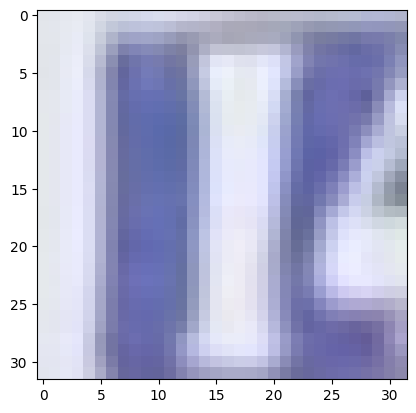

Label:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [70]:
# Plot a random image and its label

plt.imshow(X_train[13529]) # Changed train_images to X_train
plt.show()

print('Label: ', y_train[13529]) # Changed train_labels to y_train

In [71]:
# Build a CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [72]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [73]:

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 91s 49ms/step - accuracy: 0.3919 - loss: 3.4946 - val_accuracy: 0.7174 - val_loss: 0.9672
Epoch 2/10
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 141s 49ms/step - accuracy: 0.7347 - loss: 0.9097 - val_accuracy: 0.7705 - val_loss: 0.8009
Epoch 3/10
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 139s 47ms/step - accuracy: 0.7593 - loss: 0.8274 - val_accuracy: 0.7768 - val_loss: 0.7762
Epoch 4/10
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 154s 54ms/step - accuracy: 0.7918 - loss: 0.7188 - val_accuracy: 0.7972 - val_loss: 0.7133
Epoch 5/10
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 91s 50ms/step - accuracy: 0.8204 - loss: 0.6213 - val_accuracy: 0.8161 - val_loss: 0.6410
Epoch 6/10
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 143s 50ms/step - accuracy: 0.8310 - loss: 0.5901 - val_accuracy: 0.8064 - val_loss: 0.6659
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 137s 48ms/step - accuracy: 0.8374 - loss: 0.5676 - val_accuracy: 0.8322 - val_loss: 0.5786
Epoch 8/10
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 140s 47ms/step - accuracy: 0.8386 - loss

In [74]:
# prompt: how to save model e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')

model.save('my_model.keras')


In [75]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload the file from your local system


Saving 99.png to 99.png


In [76]:
# Step 2: Load, preprocess, and make predictions
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [77]:
# Load the uploaded image
image_filename = list(uploaded.keys())[0]  # Get the filename of the uploaded image
image = Image.open(image_filename)  # Open the image


In [78]:
# Preprocess the image (resize to the input shape of your model, e.g., 32x32)
image_resized = image.resize((32, 32))
image_array = np.array(image_resized)

In [79]:
# Normalize the image
image_array = image_array / 255.0

In [80]:
# Add batch dimension
image_array = np.expand_dims(image_array, axis=0)

Predicted class: 2


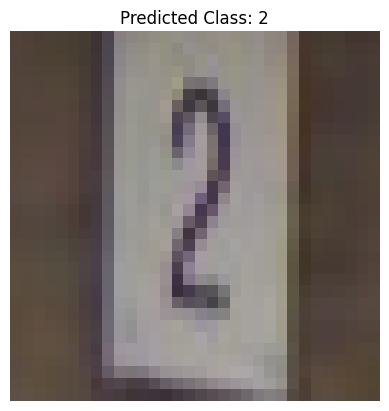

In [81]:
# Print the predicted class
print(f"Predicted class: {predicted_class}")

# Step 3: Display the image
plt.imshow(image_resized)
plt.axis('off')  # Turn off axis labels
plt.title(f'Predicted Class: {predicted_class}')  # Add title with predicted class
plt.show()  # Show the image

In [82]:
# Test the image using the trained model
predictions = model.predict(image_array)

# Get the class with the highest probability
predicted_class = np.argmax(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


In [83]:
# prompt: what would be the next code

from google.colab import files
files.download('my_model.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [84]:
# prompt: how i can creat color confusion matrix

import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()



In [85]:
# Assuming you have y_val (true labels) and predictions from your model
y_pred = np.argmax(model.predict(X_val), axis=1)
y_true = np.argmax(y_val, axis=1)



458/458 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step


In [86]:
# Compute the confusion matrix
cnf_matrix = confusion_matrix(y_true, y_pred)



In [87]:
# Define class labels (e.g., for SVHN, it's digits 0-9)
class_names = list(range(10))



Confusion matrix, without normalization
[[2569   37   18   98    9   27   38    8    9   33]
 [  49 1876    9   73   16    4   40   16   34   16]
 [  73   61 1142   57  181   41   23   48   40   24]
 [  44   24    5 1310   11   11    8    4   13   10]
 [  19   19   40   25 1207   36    7    5   13    6]
 [  21   14   21   50  130  831    5   36    8   37]
 [  52   61   10   23   12    5  944    1    6    9]
 [  37   36   27   29   43   72    8  692   37   33]
 [  19   36    8   55   35    6    5    9  701   43]
 [  44    9    5   26    7   15    8    4   13  828]]


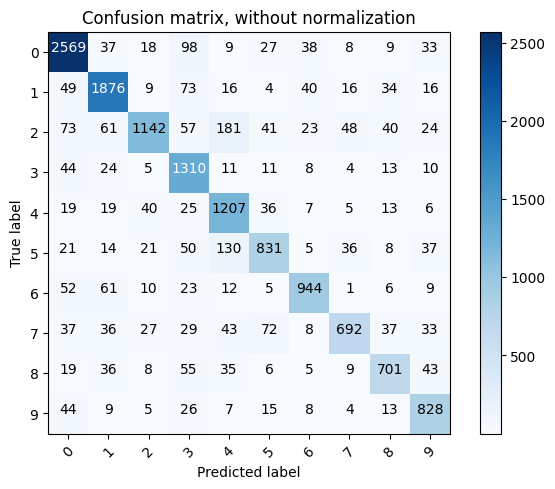

In [88]:
# Plot the confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')



Normalized confusion matrix
[[9.02670415e-01 1.30007027e-02 6.32466620e-03 3.44342937e-02
  3.16233310e-03 9.48699930e-03 1.33520731e-02 2.81096275e-03
  3.16233310e-03 1.15952214e-02]
 [2.29723394e-02 8.79512424e-01 4.21940928e-03 3.42240975e-02
  7.50117206e-03 1.87529301e-03 1.87529301e-02 7.50117206e-03
  1.59399906e-02 7.50117206e-03]
 [4.31952663e-02 3.60946746e-02 6.75739645e-01 3.37278107e-02
  1.07100592e-01 2.42603550e-02 1.36094675e-02 2.84023669e-02
  2.36686391e-02 1.42011834e-02]
 [3.05555556e-02 1.66666667e-02 3.47222222e-03 9.09722222e-01
  7.63888889e-03 7.63888889e-03 5.55555556e-03 2.77777778e-03
  9.02777778e-03 6.94444444e-03]
 [1.37981118e-02 1.37981118e-02 2.90486565e-02 1.81554103e-02
  8.76543210e-01 2.61437908e-02 5.08351489e-03 3.63108206e-03
  9.44081336e-03 4.35729847e-03]
 [1.82133565e-02 1.21422376e-02 1.82133565e-02 4.33651344e-02
  1.12749350e-01 7.20728534e-01 4.33651344e-03 3.12228968e-02
  6.93842151e-03 3.20901995e-02]
 [4.63045414e-02 5.43187890e-0

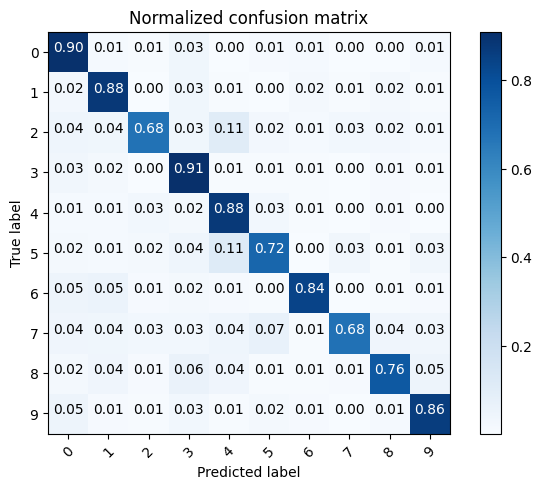

In [89]:
# You can also plot a normalized confusion matrix if you prefer
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')


In [90]:
from sklearn.metrics import confusion_matrix, classification_report
# Use X_val which is defined
predictions = model.predict(X_val)
y_pred = np.argmax(predictions, axis=1)



458/458 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step


In [91]:
# Convert y_val to 1D array of predicted class labels
y_true = np.argmax(y_val, axis=1)
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

[[2569   37   18   98    9   27   38    8    9   33]
 [  49 1876    9   73   16    4   40   16   34   16]
 [  73   61 1142   57  181   41   23   48   40   24]
 [  44   24    5 1310   11   11    8    4   13   10]
 [  19   19   40   25 1207   36    7    5   13    6]
 [  21   14   21   50  130  831    5   36    8   37]
 [  52   61   10   23   12    5  944    1    6    9]
 [  37   36   27   29   43   72    8  692   37   33]
 [  19   36    8   55   35    6    5    9  701   43]
 [  44    9    5   26    7   15    8    4   13  828]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      2846
           1       0.86      0.88      0.87      2133
           2       0.89      0.68      0.77      1690
           3       0.75      0.91      0.82      1440
           4       0.73      0.88      0.80      1377
           5       0.79      0.72      0.76      1153
           6       0.87      0.84      0.85      1123
           7       0.84      0.68   

In [92]:


# Load the saved model
loaded_model = tf.keras.models.load_model('svhn_model.h5')

# You can now use the loaded model for predictions or further analysis.
# For example, to make predictions on new data:
# new_predictions = loaded_model.predict(new_data)


In [93]:


# Evaluate the model on the validation set
loss, accuracy = loaded_model.evaluate(X_val, y_val)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")


458/458 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8445 - loss: 44.0894
Validation Loss: 45.1484
Validation Accuracy: 0.8445


In [94]:

# Validation Accuracy: 0.8812

import matplotlib.pyplot as plt

# Data for the graph
validation_loss = 0.4244
validation_accuracy = 0.8812



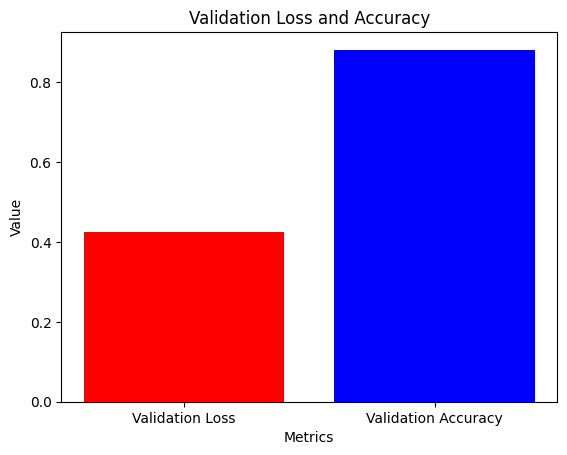

In [95]:
# Create a bar chart
metrics = ['Validation Loss', 'Validation Accuracy']
values = [validation_loss, validation_accuracy]
plt.bar(metrics, values, color=['red', 'blue'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Validation Loss and Accuracy')

# Display the graph
plt.show()


In [ ]:
# Evaluate train and validation accuracies and losses

# Assuming 'model' is your trained model object
# and you have X_train and y_train for training data
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val)) # Example

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

Epoch 1/10
1831/1832 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8495 - loss: 0.5126

In [ ]:
# Visualize epochs vs. train and validation accuracies and losses

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Epochs vs. Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Epochs vs. Training and Validation Loss')

plt.show()

In [ ]:
plot_convolutional_filters(img)